In [2]:
import sys, os
import numpy as np

from plotting import plot_utils
from model_fitting import initialize_fitting 
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm


In [16]:
# load semantic discrim results

subject = 'all'

which_prf_grid = 5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    
n_prfs = models.shape[0]

feature_type_list = ['gabor_solo','pyramid_texture_ll','sketch_tokens']
n_feature_types = len(feature_type_list)

corr_result_all = []
discrim_result_all = []
partial_corr_result_all = []
axes_to_do_partial = [0,2,3]

for ff in range(n_feature_types):
    
    feature_type = feature_type_list[ff]

    corr, discrim, nsamp, names, signed_names = \
        load_feature_stats.load_feature_semantic_corrs(feature_type, subject='all')
    partial_corr, partial_nsamp, partial_names, partial_signed_names = \
        load_feature_stats.load_feature_semantic_partial_corrs(feature_type, subject='all')

    corr_result_all.append(corr)
    discrim_result_all.append(discrim)
    partial_corr_result_all.append(partial_corr)


In [9]:
# make some groups (averaging over all superord or basic level discrims)
# will help smooth out the noise for these low-n discriminations

inds2group = [[0], [1], [2], [3], [4], np.arange(5,17), np.arange(28,44), \
              np.arange(17,28), np.arange(44,56)]
group_names = [names[ii] for ii in [0,1,2,3,4]] + \
                ['things-superord','stuff-superord' ,'things-basic', 'stuff-basic']

sem_discrim_grouped_all = []
sem_corr_grouped_all = []

for ff in range(n_feature_types):

    n_features = discrim_result_all[ff].shape[0]
    
    sem_discrim_grouped = np.zeros((n_features, n_prfs, len(group_names)))
    sem_corr_grouped = np.zeros((n_features, n_prfs, len(group_names)))

    for gg, inds in enumerate(inds2group):
        # here we need a nanmean, because some of these values can be nan, when there were not
        # enough trials for at least one of the categories. Consider only the not-nan ones here.
        sem_discrim_grouped[:,:,gg] = np.nanmean(np.abs(discrim_result_all[ff][:,:,inds]), axis=2)
        sem_corr_grouped[:,:,gg] = np.nanmean(np.abs(corr_result_all[ff][:,:,inds]), axis=2)
        
    sem_discrim_grouped_all.append(sem_discrim_grouped)
    sem_corr_grouped_all.append(sem_corr_grouped)

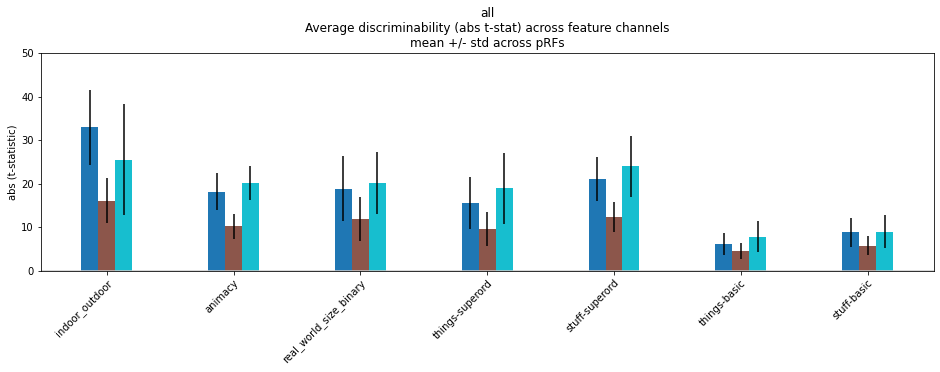

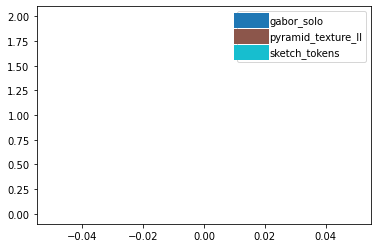

In [10]:
# Plot abs t-statistic, across all features

dd2plot = [0,2,3,5,6,7,8]
names_plot = [group_names[dd] for dd in dd2plot]
# first mean across feature channels
vals = np.concatenate([np.mean(sem_discrim_grouped_all[ff][:,:,dd2plot], axis=0, keepdims=True) \
                       for ff in range(n_feature_types)], axis=0)
# then mean across pRFs
mean_vals = np.mean(vals, axis=1)
sem_vals = np.std(vals, axis=1)

title = '%s\nAverage discriminability (abs t-stat) across feature channels\nmean +/- std across pRFs'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=names_plot, ylabel='abs (t-statistic)', \
                            ylim=[0, 50], title=title, horizontal_line_pos=0,\
                            legend_labels=feature_type_list, \
                            legend_overlaid=False, legend_separate=True, \
                            fig_size=(16,4))


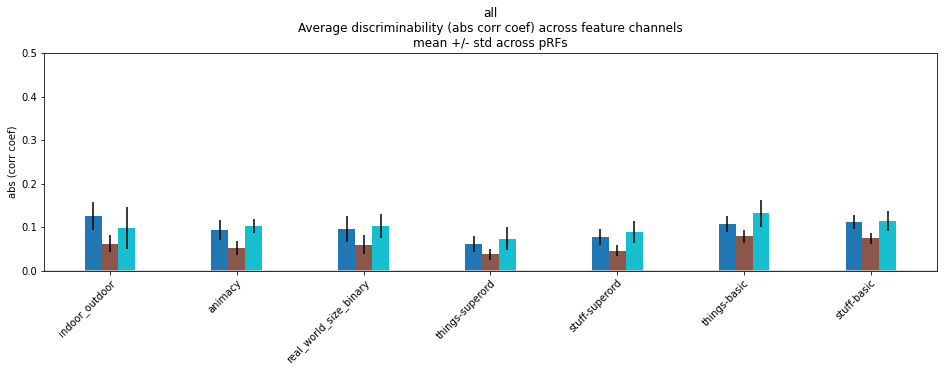

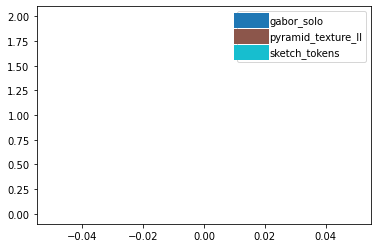

In [12]:
# Plot abs corr coef, across all features

dd2plot = [0,2,3,5,6,7,8]
names_plot = [group_names[dd] for dd in dd2plot]
# first mean across feature channels
vals = np.concatenate([np.mean(sem_corr_grouped_all[ff][:,:,dd2plot], axis=0, keepdims=True) \
                       for ff in range(n_feature_types)], axis=0)
# then mean across pRFs
mean_vals = np.mean(vals, axis=1)
sem_vals = np.std(vals, axis=1)

title = '%s\nAverage discriminability (abs corr coef) across feature channels\nmean +/- std across pRFs'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=names_plot, ylabel='abs (corr coef)', \
                            ylim=[0, 0.5], title=title, horizontal_line_pos=0,\
                            legend_labels=feature_type_list, \
                            legend_overlaid=False, legend_separate=True, \
                            fig_size=(16,4))


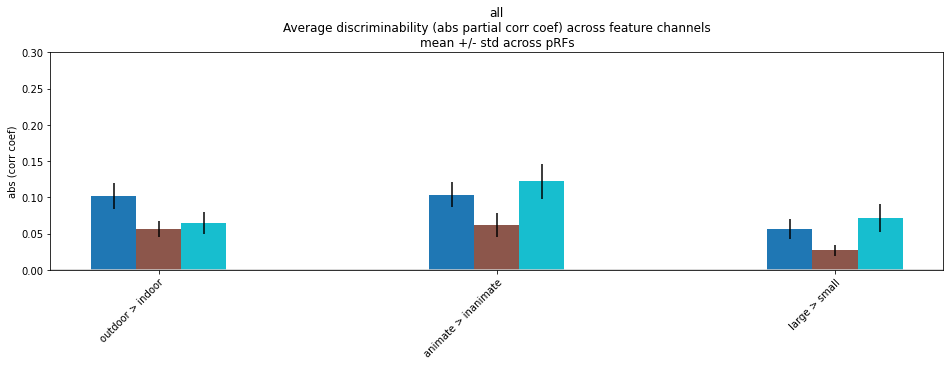

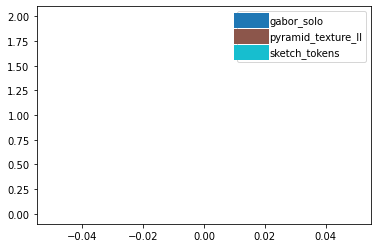

In [13]:
# Plot abs corr coef, across all features

# first mean across feature channels
vals = np.concatenate([np.mean(np.abs(partial_corr_result_all[ff]), axis=0, keepdims=True) \
                       for ff in range(n_feature_types)], axis=0)
# then mean across pRFs
mean_vals = np.mean(vals, axis=1)
sem_vals = np.std(vals, axis=1)

title = '%s\nAverage discriminability (abs partial corr coef) across feature channels\nmean +/- std across pRFs'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=partial_signed_names, ylabel='abs (corr coef)', \
                            ylim=[0, 0.3], title=title, horizontal_line_pos=0,\
                            legend_labels=feature_type_list, \
                            legend_overlaid=False, legend_separate=True, \
                            fig_size=(16,4))


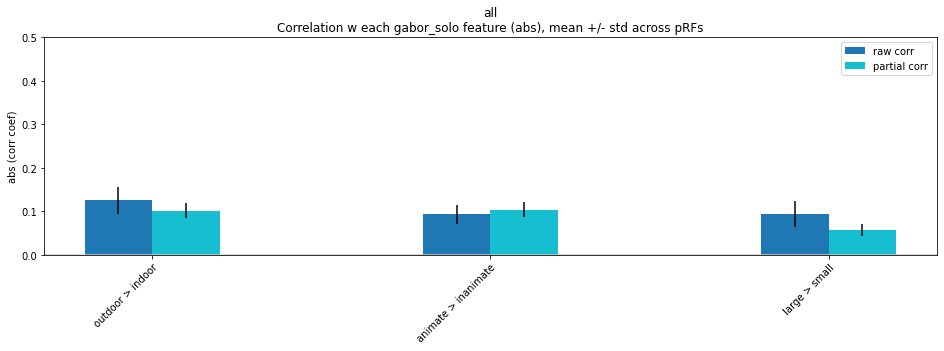

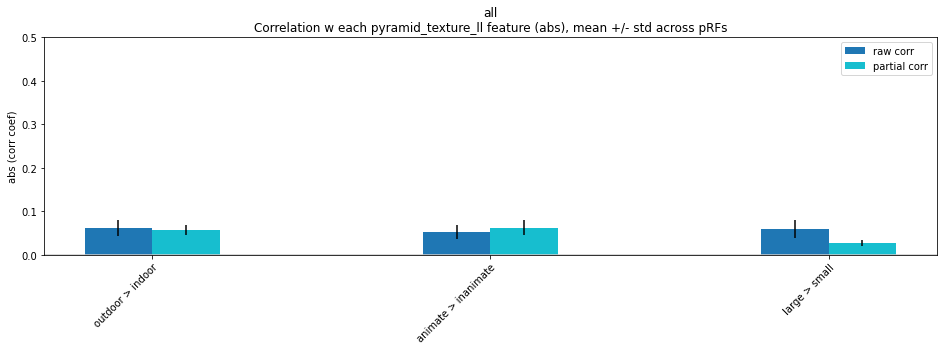

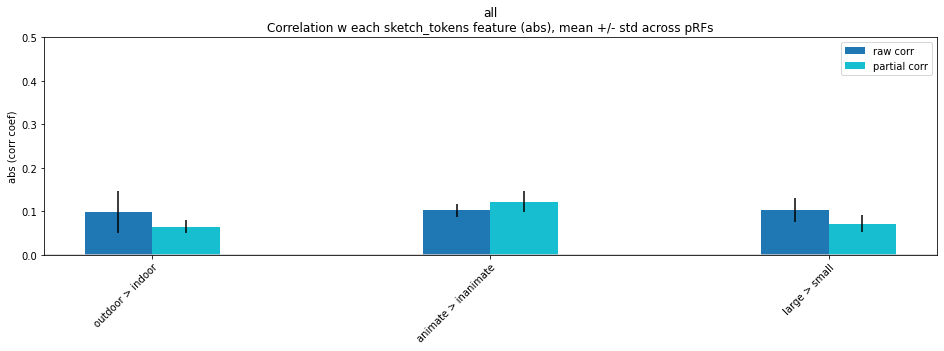

In [17]:
# Plot partial correlation coefficients for three main axes, across all features

for ff in range(n_feature_types):

    # first mean across features
    vals = np.concatenate( [np.mean(np.abs(corr_result_all[ff][:,:,axes_to_do_partial]), axis=0, \
                                     keepdims=True), \
                            np.mean(np.abs(partial_corr_result_all[ff]), axis=0, keepdims=True),], axis=0)
    # then mean across pRFs
    mean_vals = np.mean(vals, axis=1)
    sem_vals = np.std(vals, axis=1)

    title = '%s\nCorrelation w each %s feature (abs), mean +/- std across pRFs'%(subject, feature_type_list[ff])

    fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                               colors=None, space=0.3, \
                                xticklabels=partial_signed_names, ylabel='abs (corr coef)', \
                                ylim=[0, 0.5], title=title, horizontal_line_pos=0,\
                                legend_labels=['raw corr','partial corr'], \
                                legend_overlaid=True, legend_separate=False, \
                                fig_size=(16,4))
